In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [ ]:
import pandas as pd
from rdkit import Chem

In [ ]:
df = pd.read_csv ('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/glass_transitiona1.csv')
df

,Amorphous Polymer,Tg_C
0,Poly(chlorotrifluoroethylene),87
1,"Poly(vinyl chloride), PVC",83
2,"Poly(vinyl fluoride), PVF",52
3,"Poly(vinylidene chloride), PVDC",-17
4,"Poly(vinylidene fluoride), PVDF",-34
...,...,...
217,Poly(vinyl methyl ketone),28
218,Poly(butyl vinyl thioether),-20
219,Poly(ethyl vinyl thioether),-7
220,Poly(methyl vinyl thioether),-1


## Find CasNo and SMILES

In [ ]:
df['name_1'] = df['Amorphous Polymer'].str.strip('Poly()')
df

,Amorphous Polymer,Tg_C,name_1
0,Poly(chlorotrifluoroethylene),87,chlorotrifluoroethylene
1,"Poly(vinyl chloride), PVC",83,"vinyl chloride), PVC"
2,"Poly(vinyl fluoride), PVF",52,"vinyl fluoride), PVF"
3,"Poly(vinylidene chloride), PVDC",-17,"vinylidene chloride), PVDC"
4,"Poly(vinylidene fluoride), PVDF",-34,"vinylidene fluoride), PVDF"
...,...,...,...
217,Poly(vinyl methyl ketone),28,vinyl methyl ketone
218,Poly(butyl vinyl thioether),-20,butyl vinyl thioether
219,Poly(ethyl vinyl thioether),-7,ethyl vinyl thioether
220,Poly(methyl vinyl thioether),-1,methyl vinyl thioether


In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=54c321a86df5362374b9e45afdb5bc1a1f4cc24cc013dfdf496c32f4fe083dcb
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
df.to_csv('glass_transition2.csv', index=False)

In [ ]:
polymers = df['Amorphous Polymer']
polymers

0        Poly(chlorotrifluoroethylene)
1            Poly(vinyl chloride), PVC
2            Poly(vinyl fluoride), PVF
3      Poly(vinylidene chloride), PVDC
4      Poly(vinylidene fluoride), PVDF
                    ...               
217          Poly(vinyl methyl ketone)
218        Poly(butyl vinyl thioether)
219        Poly(ethyl vinyl thioether)
220       Poly(methyl vinyl thioether)
221         Poly(vinyl phenyl sulfide)
Name: Amorphous Polymer, Length: 222, dtype: object

In [ ]:
polymers1 = polymers[0:10]
polymers1

0      Poly(chlorotrifluoroethylene)
1          Poly(vinyl chloride), PVC
2          Poly(vinyl fluoride), PVF
3    Poly(vinylidene chloride), PVDC
4    Poly(vinylidene fluoride), PVDF
5                       Teflon, PTFE
6          Polychloroprene, Neoprene
7                   Poly(acrylamide)
8       Poly(N,N-dimethylacrylamide)
9        Poly(2-cyanobutyl acrylate)
Name: Amorphous Polymer, dtype: object

In [ ]:
import wikipedia
polymers_cas = []

In [ ]:
url = wikipedia.page("Nylon 6").url
url

'https://en.wikipedia.org/wiki/Nylon'

In [ ]:
for polymer in polymers1:
    try:
        url = wikipedia.page(polymer).url
        html = pd.read_html(url, header = 0)
        df3 = html[0]
        df3 = df3.fillna('0')
        df3.columns =['Name', 'values']
        df4 = df3.loc[df3.Name == 'CAS Number']
        print(df4.values[0][1])
        polymers_cas.append(df4.values[0][1])
    except:
        polymers_cas.append('0')
        print('0')

9002-83-9
0
0
9002-85-1
0
0
9010-98-4
9003-05-8
0
0


# Chemical structures using SMILES and rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

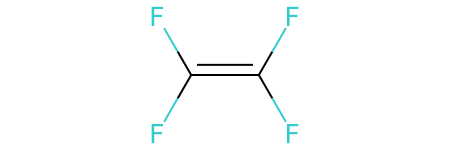

In [ ]:
mol = Chem.MolFromSmiles('FC(F)=C(F)F')
mol

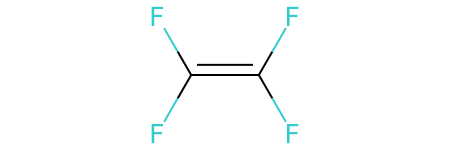

In [ ]:
# from bkchem also correct F\C(\F)=C(\F)/F
mol = Chem.MolFromSmiles('F\C(\F)=C(\F)/F')
mol

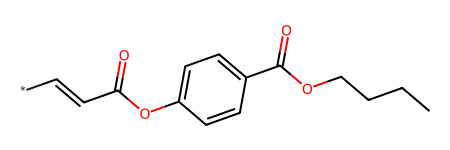

In [ ]:
mol = Chem.MolFromSmiles('*C=CC(=O)Oc1ccc(C(=O)OCCCC)cc1')
mol

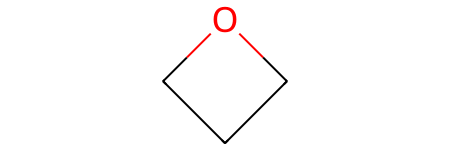

In [ ]:
mol = Chem.MolFromSmiles('C1CCO1')
mol

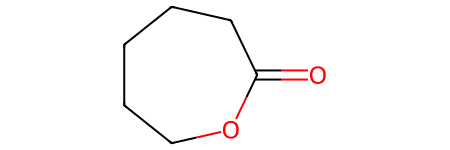

In [ ]:
mol = Chem.MolFromSmiles('O=C1CCCCCO1')
mol

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/glass_transition_b1.csv')
df

,Polymer Name,Smile,Tg_k
0,Poly(1-pentenylene),C1CC=CC1,178
1,Polycyclopentene,C1CC=CC1,178
2,Poly(tetramethylene glycol),C1CCCO1,189
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193
...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500


## Finding molecular weight

In [ ]:
from rdkit.Chem.Descriptors import ExactMolWt
ExactMolWt(Chem.MolFromSmiles('C=CC(=O)Oc1ccc(CCCOC)cc1'))

220.109944372

In [ ]:
#list1 = df['Smile'].tolist()
list1[:10]

['C1CC=CC1',
 'C1CC=CC1',
 'C1CCCO1',
 'CCCCCCOCC1CO1',
 'CCCCCCCCOC=C',
 'CCCCOCC1CO1',
 'C1CCO1',
 'CCC=CC=C',
 'CCC=CC=C',
 'C=CC(=O)Oc1ccc(CCCOC)cc1']

In [ ]:
list2 = list1[0:10]

In [ ]:
list3 = []
for name in list1:
    try:
        mw = ExactMolWt(Chem.MolFromSmiles(name))
        list3.append(mw)
    except:
        print(name)

In [ ]:
df['Molecular_weight'] = list3
df

,Polymer Name,Smile,Tg_k,Molecular_weight
0,Poly(1-pentenylene),C1CC=CC1,178,68.062600
1,Polycyclopentene,C1CC=CC1,178,68.062600
2,Poly(tetramethylene glycol),C1CCCO1,189,72.057515
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189,158.130680
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193,156.151415
...,...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479,395.998985
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482,472.030285
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489,535.992186
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500,461.891760


# Morgan Fingerprint

In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
import numpy as np
from rdkit import Chem

In [ ]:
morgan_ref = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles('CC')),3, nBits=1024)
morgan_arr_r = np.zeros((1,))
DataStructs.ConvertToNumpyArray(morgan_ref, morgan_arr_r)
print(morgan_arr_r.shape)
morgan_arr2 = np.nonzero(morgan_arr_r)
print(morgan_arr2)

(1024,)
(array([ 33, 251]),)


In [ ]:
morgan_ref = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles('[*]CC[*]')),3, nBits=1024)
morgan_arr_r = np.zeros((1,))
DataStructs.ConvertToNumpyArray(morgan_ref, morgan_arr_r)
print(morgan_arr_r.shape)
morgan_arr2 = np.nonzero(morgan_arr_r)
print(morgan_arr2)

(1024,)
(array([ 80,  93, 226, 247, 757]),)


In [ ]:
#morgan finger print

morganlist = []
for name in list1:
    try:
        #morgan = ExactMolWt(Chem.MolFromSmiles(name))
        #morgan = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles(name)),2, nBits=1024)
        morgan = AllChem.GetMorganFingerprintAsBitVect((Chem.MolFromSmiles(name)),2, nBits=1024)
        morgan_arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(morgan, morgan_arr)
        #print(morgan_arr.shape)
        #morgan_arr2 = np.nonzero(morgan_arr)
        morganlist.append(morgan_arr)
    except:
        print(name)

In [ ]:
morganlist[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
df_morgan = pd.DataFrame(morganlist)
df_morgan

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['Tg_k']
y

0      178
1      178
2      189
3      189
4      193
      ... 
347    479
348    482
349    489
350    500
351    538
Name: Tg_k, Length: 352, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_morgan, y, test_size=0.2, random_state=32)

## Random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest_reg2.score(X_train, y_train)

0.9677471049266928

In [ ]:
y_predict = forest_reg2.predict(X_test)

In [ ]:
#import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

36.43778407264053

In [ ]:
#saving and loading model
import pickle
filename = '/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/rf_glass_transition_model2.sav'
pickle.dump(forest_reg2, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'rf_glass_transition_model2.sav'
forest_reg2 = pickle.load(open(filename, 'rb'))

# Additional descriptors

In [ ]:
df

,Polymer Name,Smile,Tg_k,Molecular_weight
0,Poly(1-pentenylene),C1CC=CC1,178,68.062600
1,Polycyclopentene,C1CC=CC1,178,68.062600
2,Poly(tetramethylene glycol),C1CCCO1,189,72.057515
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189,158.130680
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193,156.151415
...,...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479,395.998985
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482,472.030285
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489,535.992186
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500,461.891760


In [ ]:
#Feature engineering
df["C_Atoms_Ring"]=df["Smile"].apply(lambda x: x.count('c'))
df["C_Atoms_Chain"]=df["Smile"].apply(lambda x: x.count('C'))
df["O_Atoms_Chain"]=df["Smile"].apply(lambda x: x.count('O'))
df["O_Atoms_Ring"]=df["Smile"].apply(lambda x: x.count('o'))
#df["N_Double Bonds_Ring"]=df["Smile"].apply(lambda x: x.count('c')/2)
df["N_Double Bonds_Chain"]=df["Smile"].apply(lambda x: x.count('='))
df["Nitrogen_Atoms"]=df["Smile"].apply(lambda x: x.count('N'))
df["F_Atoms"]=df["Smile"].apply(lambda x: x.count('F'))
#df["MW"]=df["Smile"].apply(lambda x: Molecular_Weight(x))
#df["Total Number of Atoms"]=df["Smile"].apply(lambda x: len(x))
#df["Number of Double Bonds"]=df["Smile"].apply(lambda x:len(x)-x.count('=')-1)
df["Number of Triple Bonds"]=df["Smile"].apply(lambda x: x.count("#"))
df["Branching"]=df["Smile"].apply(lambda x: (x.count("(")+x.count(")"))/2)
df["Chlorine_Atoms"]=df["Smile"].apply(lambda x: x.count('Cl'))
df["Bromine_Atoms"]=df["Smile"].apply(lambda x: x.count('Br'))
df["Sulphur_Atoms"]=df["Smile"].apply(lambda x: x.count('S'))
df["Two_Structures"]=df["Smile"].apply(lambda x: x.count('.'))
#df["If_Aromatic"]=df["Smile"].apply(lambda x: 1 if 'c' in x else 0)
df["No_of_Branched_C"]=df["Smile"].apply(lambda x: x.count('(C)'))
df["No_of_Branched_F"]=df["Smile"].apply(lambda x: x.count('(F)'))
df["No_of_Branched_Cl"]=df["Smile"].apply(lambda x: x.count('(Cl)'))
df["No_of_Branched_Br"]=df["Smile"].apply(lambda x: x.count('(Br)'))
df["No_of_Branched_=O"]=df["Smile"].apply(lambda x: x.count('(=O)'))
df["Number_of_C=C"]=df["Smile"].apply(lambda x: x.count('C=C')+x.count('cc'))
df["Number_of_C-C"]=df["Smile"].apply(lambda x: x.count('CC'))
#df["Benze_Ring"]=df["Smile"].apply(lambda x: x.count('c1ccccc1'))
#df["Benze_Ring_var"]=df["Smile"].apply(lambda x: x.count('c1cc'))
#df["Benze_Ring_varr"]=df["Smile"].apply(lambda x: x.count('cc1'))
df["n_atoms"]=df["Smile"].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
df

,Polymer Name,Smile,Tg_k,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,...,Sulphur_Atoms,Two_Structures,No_of_Branched_C,No_of_Branched_F,No_of_Branched_Cl,No_of_Branched_Br,No_of_Branched_=O,Number_of_C=C,Number_of_C-C,n_atoms
0,Poly(1-pentenylene),C1CC=CC1,178,68.062600,0,5,0,0,1,0,...,0,0,0,0,0,0,0,1,2,5
1,Polycyclopentene,C1CC=CC1,178,68.062600,0,5,0,0,1,0,...,0,0,0,0,0,0,0,1,2,5
2,Poly(tetramethylene glycol),C1CCCO1,189,72.057515,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,5
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189,158.130680,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,4,11
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193,156.151415,0,10,1,0,1,0,...,0,0,0,0,0,0,0,1,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479,395.998985,18,2,4,0,2,0,...,1,1,0,0,0,0,2,6,0,25
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482,472.030285,24,2,4,0,2,0,...,1,1,0,0,0,0,2,8,0,31
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489,535.992186,24,2,6,0,4,0,...,2,1,0,0,0,0,4,8,0,34
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500,461.891760,12,10,3,0,1,0,...,0,1,0,0,2,0,1,2,1,25


In [ ]:
X = df.drop([' Polymer Name','Smile', 'Tg_k' ], axis='columns')
X

,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,Number of Triple Bonds,Branching,...,Sulphur_Atoms,Two_Structures,No_of_Branched_C,No_of_Branched_F,No_of_Branched_Cl,No_of_Branched_Br,No_of_Branched_=O,Number_of_C=C,Number_of_C-C,n_atoms
0,68.062600,0,5,0,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,1,2,5
1,68.062600,0,5,0,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,1,2,5
2,72.057515,0,4,1,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,5
3,158.130680,0,9,2,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,4,11
4,156.151415,0,10,1,0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,1,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,395.998985,18,2,4,0,2,0,0,0,5.0,...,1,1,0,0,0,0,2,6,0,25
348,472.030285,24,2,4,0,2,0,0,0,6.0,...,1,1,0,0,0,0,2,8,0,31
349,535.992186,24,2,6,0,4,0,0,0,8.0,...,2,1,0,0,0,0,4,8,0,34
350,461.891760,12,10,3,0,1,0,0,0,9.0,...,0,1,0,0,2,0,1,2,1,25


In [ ]:
y = df['Tg_k']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

### RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest_reg2.score(X_train, y_train)

0.9791250567028308

In [ ]:
y_predict = forest_reg2.predict(X_test)

In [ ]:
#import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

28.676734827428117

In [ ]:
forest_reg2.feature_importances_

array([7.14102975e-02, 4.27339187e-01, 4.50016719e-02, 3.76494957e-02,
       0.00000000e+00, 1.40968876e-02, 1.41571594e-01, 1.55422047e-03,
       1.47326251e-03, 6.39050249e-02, 1.27083748e-02, 7.23855206e-03,
       3.19733038e-05, 1.67447116e-03, 1.03162026e-02, 7.29086574e-04,
       5.80210183e-05, 0.00000000e+00, 5.61932970e-03, 1.46562115e-02,
       9.14079377e-02, 5.15581983e-02])

In [ ]:
import matplotlib.pyplot as plt

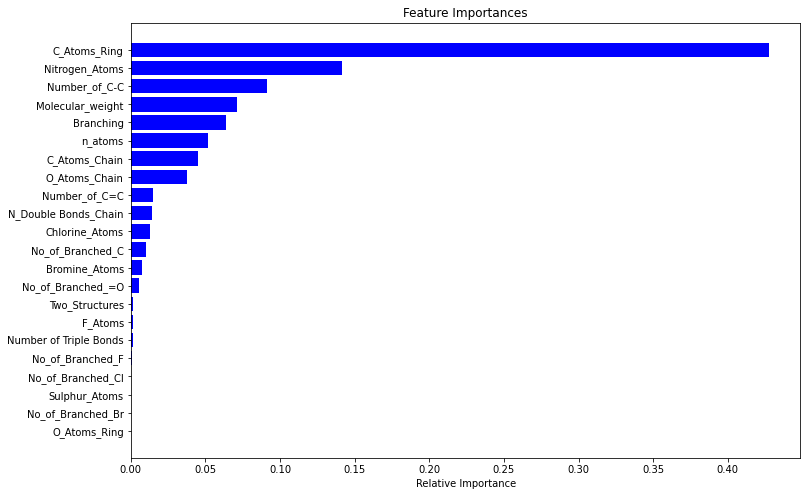

In [ ]:
features = X_train.columns
#features = X['feature_names']
importances = forest_reg2.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
indices

array([ 4, 17, 12, 16, 15,  8,  7, 13, 18, 11, 14, 10,  5, 19,  3,  2, 21,
        9,  0, 20,  6,  1])

In [ ]:
#saving and loading model
import pickle
filename = '/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/rf_gt_additional_features_only.sav'
pickle.dump(forest_reg2, open(filename, 'wb'))

# Additional descriptors and Morgan finger prints

In [ ]:
df_morgan_comb = pd.concat([X, df_morgan], axis=1)
df_morgan_comb                  

,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,Number of Triple Bonds,Branching,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,68.062600,0,5,0,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68.062600,0,5,0,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.057515,0,4,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,158.130680,0,9,2,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,156.151415,0,10,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,395.998985,18,2,4,0,2,0,0,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,472.030285,24,2,4,0,2,0,0,0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,535.992186,24,2,6,0,4,0,0,0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,461.891760,12,10,3,0,1,0,0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['Tg_k']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_morgan_comb, y, test_size=0.2, random_state=32)

### RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestRegressor()

In [ ]:
X_train

,Molecular_weight,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,Number of Triple Bonds,Branching,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
195,162.068080,6,4,2,0,2,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,64.012457,0,2,0,0,1,0,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28,30.010565,0,1,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,204.115030,6,7,2,0,2,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,204.020971,0,6,2,0,2,0,5,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,162.104465,6,5,1,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,210.050379,0,8,3,0,3,0,3,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,224.120115,12,4,1,0,1,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,158.094294,0,8,3,0,2,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
forest_reg2.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9807271117267542

In [ ]:
y_predict = forest_reg2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
#import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

27.815838363061868

#### Feature Importances

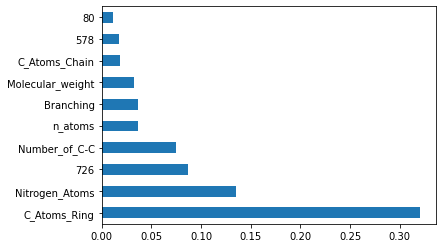

In [ ]:
feat_importances = pd.Series(forest_reg2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
indices

array([1045,  561,  564,  565,  566,  568,  570,  571,  573,  559])

In [ ]:
#saving and loading model
import pickle
filename = '/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/rf_gt_additional_features_morgan.sav'
pickle.dump(forest_reg2, open(filename, 'wb'))

# PaDEL Descriptors

In [ ]:
df

,Polymer Name,Smile,Tg_k
0,Poly(1-pentenylene),C1CC=CC1,178
1,Polycyclopentene,C1CC=CC1,178
2,Poly(tetramethylene glycol),C1CCCO1,189
3,Poly[oxy(hexyloxymethyl)ethylene],CCCCCCOCC1CO1,189
4,Poly(octyl vinyl ether),CCCCCCCCOC=C,193
...,...,...,...
347,"Poly(oxy-1,4-phenyleneoxy-1,4-phenylenesulfony...",Oc1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl,479
348,"Poly(oxy-1,4-biphenyleneoxy-1,4-phenylenesulfo...",Oc1ccc(cc1)c1ccc(cc1)O.Clc1ccc(cc1)S(=O)(=O)c1...,482
349,"Poly(oxy-1,4-phenylenesulfonyl-1,4-phenylene)",Clc1ccc(cc1)S(=O)(=O)c1ccc(cc1)Cl.Oc1ccc(cc1)S...,489
350,"Poly(2,6,3',5'-tetrachloro bisphenol A carbonate)",CC(c1cc(Cl)c(c(c1)Cl)O)(c1cc(Cl)c(c(c1)Cl)O)C....,500


In [ ]:
list1 = df['Smile'].tolist()
list2 = list1[:10]
list2

['C1CC=CC1',
 'C1CC=CC1',
 'C1CCCO1',
 'CCCCCCOCC1CO1',
 'CCCCCCCCOC=C',
 'CCCCOCC1CO1',
 'C1CCO1',
 'CCC=CC=C',
 'CCC=CC=C',
 'C=CC(=O)Oc1ccc(CCCOC)cc1']

In [ ]:
!pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.2 MB/s 


In [ ]:
from padelpy import from_smiles

In [ ]:
from tqdm import tqdm

In [ ]:
#PaDel Descriptors
padel_desc_list = []
for name in tqdm(list1):
    try:
        padel_1 = from_smiles(name)        
        padel_desc_list.append(padel_1)
        
    except:
        print(name)  
        padel_desc_list.append(0)

  4%|▍         | 14/352 [04:30<5:33:01, 59.12s/it]

C=C


  8%|▊         | 29/352 [08:45<5:19:35, 59.37s/it]

C=O


100%|██████████| 352/352 [37:50<00:00,  6.45s/it]


In [ ]:
padel_desc_list[15]

OrderedDict([('nAcid', '0'),
             ('ALogP', '1.7959000000000003'),
             ('ALogp2', '3.225256810000001'),
             ('AMR', '19.9313'),
             ('apol', '12.374344'),
             ('naAromAtom', '0'),
             ('nAromBond', '0'),
             ('nAtom', '12'),
             ('nHeavyAtom', '4'),
             ('nH', '8'),
             ('nB', '0'),
             ('nC', '4'),
             ('nN', '0'),
             ('nO', '0'),
             ('nS', '0'),
             ('nP', '0'),
             ('nF', '0.0'),
             ('nCl', '0.0'),
             ('nBr', '0.0'),
             ('nI', '0.0'),
             ('nX', '0.0'),
             ('ATS0m', '585.1849960000002'),
             ('ATS1m', '529.649067'),
             ('ATS2m', '536.761515'),
             ('ATS3m', '193.71340800000004'),
             ('ATS4m', '21.337344'),
             ('ATS5m', '0.0'),
             ('ATS6m', '0.0'),
             ('ATS7m', '0.0'),
             ('ATS8m', '0.0'),
             ('ATS0v', '194

In [ ]:
len(padel_desc_list[1])

1875

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/padel_desc_list_1.pkl', 'wb') as f:
    pickle.dump(padel_desc_list, f)

In [ ]:
padel_desc_list2 = padel_desc_list[0:100]

In [ ]:
df_padel_1 = pd.DataFrame(padel_desc_list2)

AttributeError: ignored

Padel could not find descriptors for some molecules

In [ ]:
#To find descriptors 0 values
count = 0 
for name in padel_desc_list:
  try:
    if len(padel_desc_list[count])<3:
      print(count)
  except:
    print(count)
  count = count+1


13
28


In [ ]:
df.iloc[13]

 Polymer Name    Poly(ethylene)
Smile                       C=C
Tg_k                        200
Name: 13, dtype: object

In [ ]:
df.iloc[28]

 Polymer Name    Polymethylene glycol
Smile                             C=O
Tg_k                              211
Name: 28, dtype: object

In [ ]:
#sampl without problems
df.iloc[10]

 Polymer Name    Poly(3-methoxypropyl acrylate)
Smile                  C=CC(=O)Oc1ccc(CCCOC)cc1
Tg_k                                        198
Name: 10, dtype: object

In [ ]:
padel_1 = from_smiles("C=CC(=O)Oc1ccc(CCCOC)cc1") 

In [ ]:
padel_2 = from_smiles("C=C") 

RuntimeError: ignored

In [ ]:
padel_3 = from_smiles('CCC')
len(padel_3)

1875

In [ ]:
from padelpy import padeldescriptor

In [ ]:
# to calculate 2-D and 3-D descriptors
padeldescriptor(d_2d=True, d_3d=False)

In [ ]:
padel_3 = from_smiles('CCC',  d_3d=False)
len(padel_3)

TypeError: ignored

In [ ]:
?from_smiles

In [ ]:
padel_1

OrderedDict([('nAcid', '0'),
             ('ALogP', '0.24390000000000006'),
             ('ALogp2', '0.059487210000000026'),
             ('AMR', '36.168800000000005'),
             ('apol', '35.95468799999998'),
             ('naAromAtom', '6'),
             ('nAromBond', '6'),
             ('nAtom', '32'),
             ('nHeavyAtom', '16'),
             ('nH', '16'),
             ('nB', '0'),
             ('nC', '13'),
             ('nN', '0'),
             ('nO', '3'),
             ('nS', '0'),
             ('nP', '0'),
             ('nF', '0.0'),
             ('nCl', '0.0'),
             ('nBr', '0.0'),
             ('nI', '0.0'),
             ('nX', '0.0'),
             ('ATS0m', '2659.5945999999985'),
             ('ATS1m', '2741.4386840000016'),
             ('ATS2m', '3446.3248630000026'),
             ('ATS3m', '3319.9994820000034'),
             ('ATS4m', '2815.618535000002'),
             ('ATS5m', '2634.599418000001'),
             ('ATS6m', '2145.772626999999'),
          

In [ ]:
df_padel

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,0.6910000000000001,0.4774810000000001,22.1338,14.134344000000002,0,0,13,5,8,...,0.4595681784627546,0.4450862172604464,0.4511966015929357,0.560327599957826,0.4416111278011021,3.918655950232581,4.465520428232406,9.557738749867683,0.35698159358480147,1.4531353293518638
1,0,0.6910000000000001,0.4774810000000001,22.1338,14.134344000000002,0,0,13,5,8,...,0.4595681784627546,0.4450862172604464,0.4511966015929357,0.560327599957826,0.4416111278011021,3.918655950232581,4.465520428232406,9.557738749867683,0.35698159358480147,1.4531353293518638
2,0,-0.7069000000000004,0.4997076100000006,16.8667,13.176344000000002,0,0,13,5,8,...,0.4991428204001513,0.35986315504760247,0.4922989253586723,0.5952491399345807,0.5844054237096472,3.53539745929521,3.758932593722304,8.413452625929187,0.2885089631716307,1.6719534890029002
3,0,-1.424499999999999,2.029200249999997,38.3178,29.44627399999997,0,0,29,11,18,...,0.9068355491672004,0.0518202123248844,0.5513824945701441,0.4575909418917015,0.3853969006851719,15.359338114096218,20.43618361496669,42.83532016895845,0.8602533237508008,1.3943703371470175
4,0,-1.6327,2.66570929,39.0885,31.73785999999997,0,0,31,11,20,...,0.9314376339991516,0.04442893490343604,0.5182698431808307,0.5833139610942172,0.49187843764781064,17.269103429759305,19.364680569649906,41.77715824593806,0.8971564509987273,1.5934622419228586
5,0,-0.8484999999999998,0.7199522499999996,32.4946,23.259101999999984,0,0,23,9,14,...,0.8676079534084755,0.07359703062982254,0.5559713032731517,0.446992098942031,0.40020704088784065,10.669328467885984,13.568116694394478,28.797137988883517,0.8014119301127134,1.4031704431030234
6,0,-0.41889999999999994,0.17547720999999994,13.9551,10.082758000000002,0,0,10,4,6,...,0.5292315936759345,0.3236219758397486,0.5190990301587962,0.33397160937107206,0.5603272901892526,3.2542766318034255,3.1428387666527158,7.265669552709427,0.29384739051390185,1.413397929719121
7,0,0.9385999999999999,0.8809699599999997,29.2761,17.22793,0,0,16,6,10,...,,,,,,,,,,
8,0,0.9385999999999999,0.8809699599999997,29.2761,17.22793,0,0,16,6,10,...,,,,,,,,,,
9,0,0.24390000000000006,0.059487210000000026,36.168800000000005,35.95468799999998,6,6,32,16,16,...,0.9067522755892399,0.06512110567699109,0.505065915941634,0.31246071837440614,0.38208193776032584,19.017038989191395,31.240661709369316,61.68008155592525,0.8601284133838599,1.1996085720763658


padel descriptor cannot determine the descriptors for monomers of polyethylene(C=C) and Polymethylene glycol(C=O). However it can detect them for both using the desktop version with 2d option.

In [ ]:
import pandas as pd
df_padel2 = pd.read_csv ('/content/gdrive/MyDrive/git_projects/glass_transition/glass_transition/descriptors2d.csv')
df_padel2

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,AUTOGEN_134,0,1.6194,2.622456,27.5106,15.408965,0,0,15,10,...,10.268278,18.262606,1.826261,12.349542,5.307849,0.0,134.0,8.0,1.958,42.0
1,AUTOGEN_296,0,0.6686,0.447026,31.6342,32.059102,6,6,28,14,...,6.789264,27.237977,1.945570,5.401340,5.401340,0.0,332.0,17.0,4.762,64.0
2,AUTOGEN_239,0,0.5209,0.271337,28.3522,29.235930,6,6,25,15,...,8.242316,29.246876,1.949792,10.658593,10.658593,0.0,414.0,19.0,2.423,68.0
3,AUTOGEN_168,0,0.7713,0.594904,32.6460,32.329516,6,6,28,16,...,7.859770,31.247973,1.952998,10.846394,10.846394,0.0,480.0,20.0,2.846,72.0
4,AUTOGEN_247,0,2.0659,4.267943,35.4906,35.152688,6,6,31,15,...,6.584356,29.017579,1.934505,5.462459,5.462459,0.0,402.0,19.0,5.082,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,AUTOGEN_35,0,-1.4434,2.083404,47.3559,37.393446,0,0,36,14,...,5.504499,26.654982,1.903927,5.378178,5.378178,0.0,435.0,12.0,4.728,52.0
348,AUTOGEN_329,0,1.4518,2.107723,15.7628,20.927551,6,6,16,9,...,8.626477,17.548927,1.949881,2.513590,0.000000,0.0,86.0,10.0,3.784,40.0
349,AUTOGEN_74,0,2.4084,5.800391,51.2910,29.906137,0,0,29,20,...,10.691172,37.253228,1.862661,24.527753,7.871036,0.0,894.0,31.0,3.355,96.0
350,AUTOGEN_270,0,1.2977,1.684025,22.9651,26.403516,6,6,23,11,...,6.438644,21.417011,1.947001,2.771970,2.771970,0.0,156.0,14.0,3.778,50.0


In [ ]:
df_padel2['Name'] = df_padel2['Name'].str.strip('AUTOGEN_')     #For sorting as values
print(df_padel2.dtypes['Name'])
df_padel2['Name'] = df_padel2['Name'].astype('int16')            #change datatype
print(df_padel2.dtypes['Name'])
df_padel2 = df_padel2.sort_values(['Name'])
df_padel2 = df_padel2.reset_index(drop=True)                    
df_padel2 = df_padel2.drop('Name', axis=1)
df_padel2

object
int16


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,0.6910,0.477481,22.1338,14.134344,0,0,13,5,8,...,5.235585,9.687500,1.937500,0.000000,0.000000,0.0,1.500000e+01,0.0,2.329,20.0
1,0,0.6910,0.477481,22.1338,14.134344,0,0,13,5,8,...,5.235585,9.687500,1.937500,0.000000,0.000000,0.0,1.500000e+01,0.0,2.329,20.0
2,0,-0.7069,0.499708,16.8667,13.176344,0,0,13,5,8,...,5.542886,9.687500,1.937500,2.875000,2.875000,0.0,1.500000e+01,0.0,0.526,20.0
3,0,-1.4245,2.029200,38.3178,29.446274,0,0,29,11,18,...,5.452782,21.122542,1.920231,5.722866,5.722866,0.0,2.110000e+02,8.0,2.145,46.0
4,0,-1.6327,2.665709,39.0885,31.737860,0,0,31,11,20,...,5.037142,20.828762,1.893524,2.851265,2.851265,0.0,2.200000e+02,8.0,4.450,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0.1428,0.020392,25.0020,51.483102,18,18,39,25,14,...,10.153820,49.407366,1.976295,18.512512,9.985490,0.0,1.360000e+11,33.0,NaN,124.0
348,0,0.1428,0.020392,25.0020,64.710274,24,25,49,31,18,...,9.633271,62.185382,2.005980,18.567530,10.040508,0.0,2.380000e+11,44.0,NaN,158.0
349,0,-0.2824,0.079750,33.6436,69.214274,24,24,52,34,18,...,10.307542,67.749073,1.992620,27.044370,15.022185,0.0,2.890000e+11,52.0,NaN,176.0
350,0,4.3369,18.808702,58.4315,51.647516,12,12,37,25,12,...,12.483561,47.991438,1.919658,21.783844,7.243416,0.0,8.400000e+10,38.0,NaN,124.0


In [ ]:
df_padel2 = df_padel2.fillna(-999)          # NaN interferes with random forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_padel2, y, test_size=0.2, random_state=32)

## RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg2 = RandomForestRegressor()
forest_reg2.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest_reg2.score(X_train, y_train)

0.9820915384210794

In [ ]:
y_predict = forest_reg2.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
#rubber_predictions_test4 = reg_mod_bay.predict(rubber2_test_comp_tr)
forest_mse4 = mean_squared_error(y_predict, y_test)
forest_rmse4 = np.sqrt(forest_mse4)
#print(rubber_predictions_test4)
forest_rmse4

29.726744878509443

### Feature Importances

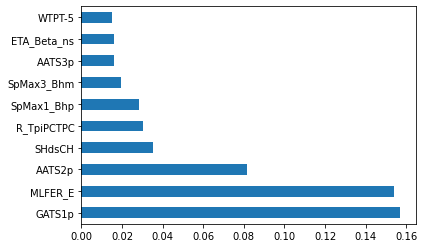

In [ ]:
feat_importances = pd.Series(forest_reg2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

GATS1p Autocorrelation

MLFER_E Molecular linear free energy relatio

AATS2p Autocorrelation

SHdsCH Atom type electrotopological state

# Summary
Polymer monomer descriptors were generated using three methods 1) Morgan fingerprint 2)Additional descriptors(21 descriptors using rdkit) and 3)PaDEL descriptors. 
The RMSE value of the Random forest models. 
 1. Morgan fp alone - 36.44
 2. Additional Descriptor - 28.68
 3. Morgan and additional - 27.82
 4. PaDel descriptors - 29.73

Additional descriptors model performed better than morgan fingerprint and slightly better than PaDEL descriptors. This could be due to the high dimensionality of the descriptors generated using these techniques. Models generated using additional descriptors and PaDEL descriptors are interpretable. Whereas, the models generated by the morgan fingerprint techniques are not interpretable. The additional descriptor model is selected for further analysis.